# Repetition code

In [1]:
import import_ipynb
import TQEC_tools
import numpy as np
import stimcirq
from cirq.contrib.svg import SVGCircuit

importing Jupyter notebook from TQEC_tools.ipynb


In [3]:
# Each idling, two qubit and single qubit gates, measurement error rate
err = 1e-4
# Number of rounds for syndrome extract circuit
R = 3

# Number of data qubits in Repetition code
Data = 5
# Number of syndrome qubits in Repetition code
Syn = Data - 1

# Physical qubit structures
Structure = np.arange( Data + Syn )
data_qubits = Structure[0::2]
syn_qubits = Structure[1::2]

# Create TQEC circuit
Rep_circuit = TQEC_tools.TQEC()
circuit = Rep_circuit.circuit

# Initialize physical qubits
Rep_circuit.physical_qubits(len(Structure))
Rep_circuit.bitflip_err(Structure,err)

################################################################
#########  Repeat syndrome extract circuit R rounds  ###########
################################################################

for _ in np.arange(R):
    
    # Syndrome extract circuit for first step 1
    Rep_circuit.cnot(data_qubits[:-1],syn_qubits)
    # Depolarizing error for each cnot gate
    Rep_circuit.two_dep_err(data_qubits[:-1],syn_qubits,err)
    # Idling errors for deactivated qubits
    Rep_circuit.idling_err(err)

    # Syndrome extract circuit for first step 2
    Rep_circuit.cnot(syn_qubits,data_qubits[1:])
    # Depolarizing error for each cnot gate
    Rep_circuit.two_dep_err(syn_qubits,data_qubits[1:],err)
    # Idling errors for deactivated qubits
    Rep_circuit.idling_err(err)

    # Bit-flip errors before we measure syndrome qubits
    Rep_circuit.bitflip_err( syn_qubits, err )
    # Measure all syndrome qubits
    Rep_circuit.measure( syn_qubits )
    # Idling errors for deactivated qubits
    Rep_circuit.idling_err(err)

################################################################
################################################################
################################################################

# Measurement data qubits with bit-flip errors
Rep_circuit.bitflip_err( data_qubits, err )
Rep_circuit.measure( data_qubits )

print( circuit )

QUBIT_COORDS 0
QUBIT_COORDS 1
QUBIT_COORDS 2
QUBIT_COORDS 3
QUBIT_COORDS 4
QUBIT_COORDS 5
QUBIT_COORDS 6
QUBIT_COORDS 7
QUBIT_COORDS 8
X_ERROR(0.0001) 0 1 2 3 4 5 6 7 8
CX 0 1 2 3 4 5 6 7
DEPOLARIZE2(0.0001) 0 1 2 3 4 5 6 7
DEPOLARIZE1(0.0001) 8
CX 1 2 3 4 5 6 7 8
DEPOLARIZE2(0.0001) 1 2 3 4 5 6 7 8
DEPOLARIZE1(0.0001) 0
X_ERROR(0.0001) 1 3 5 7
MR 1 3 5 7
DEPOLARIZE1(0.0001) 0 2 4 6 8
CX 0 1 2 3 4 5 6 7
DEPOLARIZE2(0.0001) 0 1 2 3 4 5 6 7
DEPOLARIZE1(0.0001) 8
CX 1 2 3 4 5 6 7 8
DEPOLARIZE2(0.0001) 1 2 3 4 5 6 7 8
DEPOLARIZE1(0.0001) 0
X_ERROR(0.0001) 1 3 5 7
MR 1 3 5 7
DEPOLARIZE1(0.0001) 0 2 4 6 8
CX 0 1 2 3 4 5 6 7
DEPOLARIZE2(0.0001) 0 1 2 3 4 5 6 7
DEPOLARIZE1(0.0001) 8
CX 1 2 3 4 5 6 7 8
DEPOLARIZE2(0.0001) 1 2 3 4 5 6 7 8
DEPOLARIZE1(0.0001) 0
X_ERROR(0.0001) 1 3 5 7
MR 1 3 5 7
DEPOLARIZE1(0.0001) 0 2 4 6 8
X_ERROR(0.0001) 0 2 4 6 8
MR 0 2 4 6 8


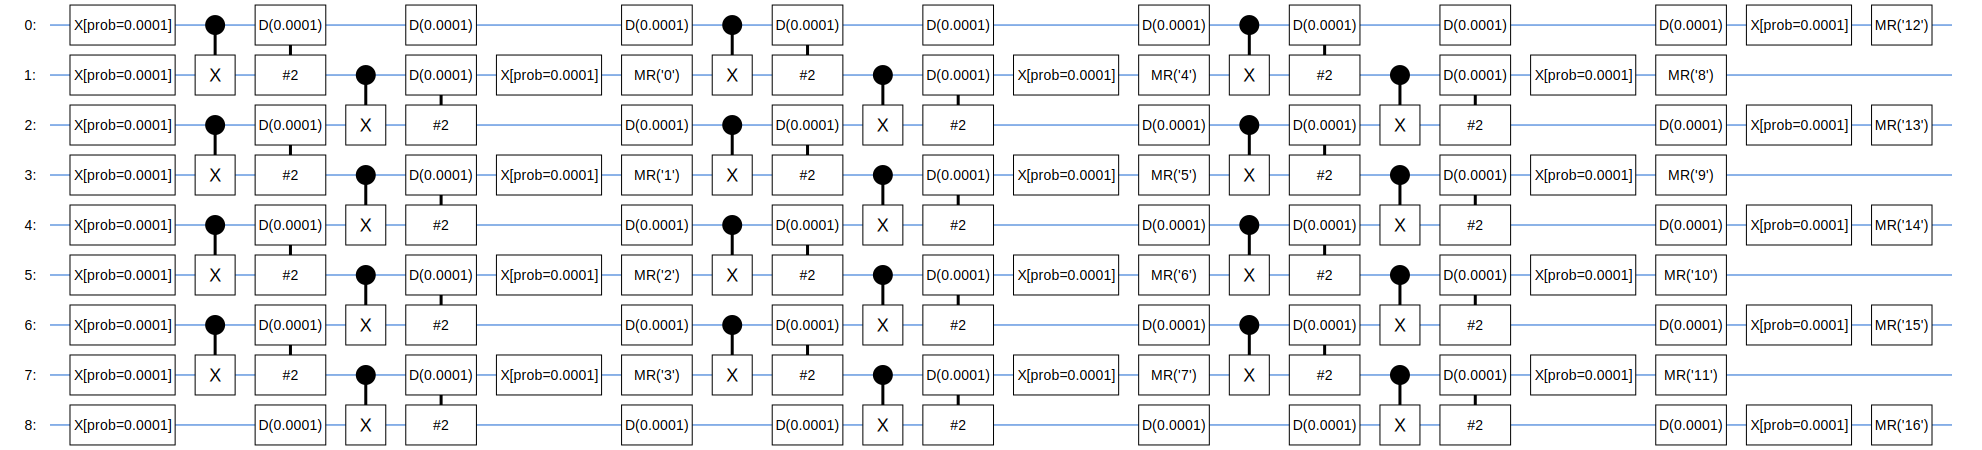

In [4]:
cirq_circuit = stimcirq.stim_circuit_to_cirq_circuit(circuit)
SVGCircuit(cirq_circuit)